#**Pandas**

Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.

**Las principales características de esta librería son:**

* Define nuevas estructuras de datos basadas en los arrays de la librería NumPy 
pero con nuevas funcionalidades.
* Permite leer y escribir fácilmente ficheros en formato CSV, Excel y bases de datos SQL.
* Permite acceder a los datos mediante índices o nombres para filas y columnas.
* Ofrece métodos para reordenar, dividir y combinar conjuntos de datos.
* Permite trabajar con series temporales.
* Realiza todas estas operaciones de manera muy eficiente.

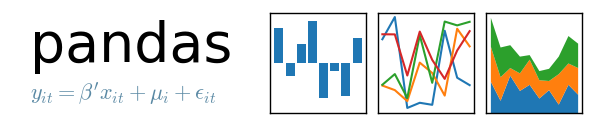

## **Tipos de datos de Pandas**

Pandas dispone de tres estructuras de datos diferentes:

* **Series**: Estructura de una dimensión.
* **DataFrame**: Estructura de dos dimensiones (tablas).
* **Panel**: Estructura de tres dimensiones (cubos).

In [4]:
datos = {'alumno': ['Zutano', 'Mengano', 'Pepe' ,'Fulanito, Cosme', 'Maria'], 'primer parcial': [7, 8,7,4, 10], 'segundo parcial': [10,9,4,10,10], 'observaciones':['ninguna','libre','ninguna','libre','oyente'], 'CI':[23000000, 12389100, 99999, 1001,30406011]}
print(datos)
print(type(datos))

{'alumno': ['Zutano', 'Mengano', 'Pepe', 'Fulanito, Cosme', 'Maria'], 'primer parcial': [7, 8, 7, 4, 10], 'segundo parcial': [10, 9, 4, 10, 10], 'observaciones': ['ninguna', 'libre', 'ninguna', 'libre', 'oyente'], 'CI': [23000000, 12389100, 99999, 1001, 30406011]}
<class 'dict'>



El tipo de datos que más frecuentemente vamos a utilizar en la materia es el dataframes de Pandas. Un dataframe esencialmente es una tabla con columnas y filas indexadas, de forma tal que podemos acceder fácilmente a filas mediante el índice. También podemos unir, separar o filtrar dataframes trabajando sobre el índice.

Los dataframes pueden tener datos no heterogéneos y además son objetos con métodos útiles para extraer información de forma rápida (por ejemplo, computar histogramas de valores). También es posible convertirlos a arrays de Numpy si así lo necesitamos, aunque no lo vamos a hacer a menos que sea realmente necesario.

Una forma de construir dataframes es a partir de diccionarios, de forma tal que asignamos una lista a cada llave, que representa una columna del dataframe:

In [5]:
# Importar Pandas a nuestro notebook
import pandas as pd

df = pd.DataFrame(datos)

df

,alumno,primer parcial,segundo parcial,observaciones,CI
0,Zutano,7,10,ninguna,23000000
1,Mengano,8,9,libre,12389100
2,Pepe,7,4,ninguna,99999
3,"Fulanito, Cosme",4,10,libre,1001
4,Maria,10,10,oyente,30406011


In [6]:
df.head()

,alumno,primer parcial,segundo parcial,observaciones,CI
0,Zutano,7,10,ninguna,23000000
1,Mengano,8,9,libre,12389100
2,Pepe,7,4,ninguna,99999
3,"Fulanito, Cosme",4,10,libre,1001
4,Maria,10,10,oyente,30406011


Vemos que las filas están identificadas con números (0,1,2). Esos números corresponden al índice (index). Podemos obtener las columnas y el índice de un dataframe como listas usando los siguientes métodos:

In [ ]:
print(list(df.columns))
print(list(df.index))

['alumno', 'primer parcial', 'segundo parcial', 'observaciones', 'CI']
[0, 1, 2, 3, 4]


Podemos ademas seleccionar una columna del dataframe como si se tratase de un diccionario. El objeto resultante se llama "series":

In [ ]:
print(type(df))
print(df['alumno'])
print(type(df['alumno']))

<class 'pandas.core.frame.DataFrame'>
0             Zutano
1            Mengano
2               Pepe
3    Fulanito, Cosme
4              Maria
Name: alumno, dtype: object
<class 'pandas.core.series.Series'>


Para obtener files en vez de columnas, podemos usar el método df.loc con una lista de los índices que queremos acceder:

In [ ]:
df.loc[2]

alumno                Pepe
primer parcial           7
segundo parcial          4
observaciones      ninguna
CI                   99999
Name: 2, dtype: object

O bien:

In [ ]:
df.loc[2:4]

,alumno,primer parcial,segundo parcial,observaciones,CI
2,Pepe,7,4,ninguna,99999
3,"Fulanito, Cosme",4,10,libre,1001
4,Maria,10,10,oyente,30406011


Podríamos haber querido otro índice en vez de [0,1,2,...] para nuestro dataframe. En ese caso, le agregamos el parámetro index a la hora de crearlo:

In [8]:
datos = {'alumno': ['Zutano', 'Mengano', 'Pepe' ,'Fulanito, Cosme', 'Maria'], 'primer parcial': [7, 8,7,4, 10], 'segundo parcial': [10,9,4,10,10], 'observaciones':['ninguna','libre','ninguna','libre','oyente'], 'CI':[23000000, 12389100, 99999, 1001,30406011]}
df = pd.DataFrame(datos, index=['uno',3,'cinco',7,'nueve'])
df.loc['uno']
print(df)

                alumno  primer parcial  segundo parcial observaciones  \
uno             Zutano               7               10       ninguna   
3              Mengano               8                9         libre   
cinco             Pepe               7                4       ninguna   
7      Fulanito, Cosme               4               10         libre   
nueve            Maria              10               10        oyente   

             CI  
uno    23000000  
3      12389100  
cinco     99999  
7          1001  
nueve  30406011  


Y el proceso de ubicar filas es igual al anterior:

In [9]:
df.loc[[7,'uno']]

,alumno,primer parcial,segundo parcial,observaciones,CI
7,"Fulanito, Cosme",4,10,libre,1001
uno,Zutano,7,10,ninguna,23000000


Puede que ya hayamos creado un dataframe y después de hacerlo nos demos cuenta de que una de las columnas tiene más sentido como índice que otra. En ese caso, lo que buscamos es reindexar el dataframe usando los valores de esa columna. En general conviene utilizar como índice algo que sea un identificador único de cada elemento en el dataframe; en este caso, el CI puede cumplir con esa función.


In [ ]:
df_CI = df.set_index('CI')
print(df_CI)

                   alumno  primer parcial  segundo parcial observaciones
CI                                                                      
23000000           Zutano             7.0             10.0       ninguna
12389100          Mengano             8.0              9.0         libre
23000000           Zutano             7.0             10.0       ninguna
99999                Pepe             7.0              4.0       ninguna
1001      Fulanito, Cosme             NaN             10.0         libre
30406011            Maria            10.0              NaN        oyente


Una ventaja del dataframe son los métodos que tiene para la limpieza de datos. Esto es útil si por ejemplo queremos descartar filas o columnas duplicadas o con datos faltantes. Supongamos que tenemos un dataframe en el cual faltan algunos datos (identificados con "nan") y algunas de las filas están duplicadas.

In [10]:
import numpy as np # necesito numpy para escribir nan
datos = {'alumno': ['Zutano', 'Mengano', 'Zutano','Pepe' ,'Fulanito, Cosme', 'Maria'], 'primer parcial': [7, 8,7,7,np.nan, 10], 'segundo parcial': [10,9,10,4,10,np.nan], 'observaciones':['ninguna','libre','ninguna','ninguna','libre','oyente'], 'CI':[23000000, 12389100,23000000, 99999, 1001,30406011]}
df = pd.DataFrame(datos)
print(df)


            alumno  primer parcial  segundo parcial observaciones        CI
0           Zutano             7.0             10.0       ninguna  23000000
1          Mengano             8.0              9.0         libre  12389100
2           Zutano             7.0             10.0       ninguna  23000000
3             Pepe             7.0              4.0       ninguna     99999
4  Fulanito, Cosme             NaN             10.0         libre      1001
5            Maria            10.0              NaN        oyente  30406011


Eliminamos las columnas que tienen Nan. Para eso usamos el método df.dropna()

In [11]:
df_2 = df.dropna()
print(df_2)

    alumno  primer parcial  segundo parcial observaciones        CI
0   Zutano             7.0             10.0       ninguna  23000000
1  Mengano             8.0              9.0         libre  12389100
2   Zutano             7.0             10.0       ninguna  23000000
3     Pepe             7.0              4.0       ninguna     99999


Observemos que había varias maneras de hacer esto. Por ejemplo, podríamos haber querido eliminar las columnas que tenían un nan, en vez de las filas:

In [ ]:
df_3 = df.dropna(axis=1)
print(df_3)

            alumno observaciones        CI
0           Zutano       ninguna  23000000
1          Mengano         libre  12389100
2           Zutano       ninguna  23000000
3             Pepe       ninguna     99999
4  Fulanito, Cosme         libre      1001
5            Maria        oyente  30406011


In [ ]:
df.dropna?

O podríamos haber querido eliminar las filas que tengan TODOS los valores nan.
También podríamos haber específicado un subset de las columnas para verificar si las filas tienen valores nan y removerlas en ese caso.

In [12]:
df_4 = df.dropna(how='all')
print(df_4)
df_5 = df.dropna(subset=['primer parcial','observaciones'])
print(df_5)

            alumno  primer parcial  segundo parcial observaciones        CI
0           Zutano             7.0             10.0       ninguna  23000000
1          Mengano             8.0              9.0         libre  12389100
2           Zutano             7.0             10.0       ninguna  23000000
3             Pepe             7.0              4.0       ninguna     99999
4  Fulanito, Cosme             NaN             10.0         libre      1001
5            Maria            10.0              NaN        oyente  30406011
    alumno  primer parcial  segundo parcial observaciones        CI
0   Zutano             7.0             10.0       ninguna  23000000
1  Mengano             8.0              9.0         libre  12389100
2   Zutano             7.0             10.0       ninguna  23000000
3     Pepe             7.0              4.0       ninguna     99999
5    Maria            10.0              NaN        oyente  30406011


En ese caso no removemos ninguna fila, porque ninguna tiene todos sus valores nan. Podemos consultar la documentación de pandas para más opciones (por ejemplo, únicamente eliminar filas que tengan más de N valores iguales a nan).

Por último, puede que no queramos crear un dataframe nuevo. En ese caso, hacemos lo siguiente y modificamos el dataframe original:

In [ ]:
df.dropna(inplace = True)
print(df)

    alumno  primer parcial  segundo parcial observaciones        CI
0   Zutano             7.0             10.0       ninguna  23000000
1  Mengano             8.0              9.0         libre  12389100
2   Zutano             7.0             10.0       ninguna  23000000
3     Pepe             7.0              4.0       ninguna     99999


Puede que no queramos eliminar las filas o columnas que tienen nan, sino llenar esas entradas usando algun valor fijo, o un promedio de las demás entradas de la fila o la columna. Para eso volvemos a definir el dataframe (porque lo modificamos en el bloque de código anterior) y luego probamos el método df.fillna()

In [21]:
datos = {'alumno': ['Zutano', 'Mengano', 'Zutano','Pepe' ,'Fulanito, Cosme', 'Maria'], 'primer parcial': [7, 8,7,7,np.nan, 10], 'segundo parcial': [10,9,10,4,10,np.nan], 'observaciones':['ninguna','libre','ninguna','ninguna','libre','oyente'], 'CI':[23000000, 12389100,23000000, 99999, 1001,30406011]}
df = pd.DataFrame(datos)
print(df)


            alumno  primer parcial  segundo parcial observaciones        CI
0           Zutano             7.0             10.0       ninguna  23000000
1          Mengano             8.0              9.0         libre  12389100
2           Zutano             7.0             10.0       ninguna  23000000
3             Pepe             7.0              4.0       ninguna     99999
4  Fulanito, Cosme             NaN             10.0         libre      1001
5            Maria            10.0              NaN        oyente  30406011


In [16]:
df_2 = df.fillna(10)
print(df_2)

            alumno  primer parcial  segundo parcial observaciones        CI
0           Zutano             7.0             10.0       ninguna  23000000
1          Mengano             8.0              9.0         libre  12389100
2           Zutano             7.0             10.0       ninguna  23000000
3             Pepe             7.0              4.0       ninguna     99999
4  Fulanito, Cosme            10.0             10.0         libre      1001
5            Maria            10.0             10.0        oyente  30406011


Esto claramente reeplaza los valores faltantes usando un valor prefijado. Podemos también usar medias o medianas:

In [ ]:
a = df['primer parcial']
print(a)
df_3 = df.fillna(a.mean())
print(df_3)

0     7.0
1     8.0
2     7.0
3     7.0
4     NaN
5    10.0
Name: primer parcial, dtype: float64
            alumno  primer parcial  segundo parcial observaciones        CI
0           Zutano             7.0             10.0       ninguna  23000000
1          Mengano             8.0              9.0         libre  12389100
2           Zutano             7.0             10.0       ninguna  23000000
3             Pepe             7.0              4.0       ninguna     99999
4  Fulanito, Cosme             7.8             10.0         libre      1001
5            Maria            10.0              7.8        oyente  30406011


Acá están sucediendo varias cosas. Primero, en a están los valores de la columna 'primer parcial'. Luego, dentro de fillna pongo a.mean() que computa el valor medio de todas las entradas que no son nan de esa columna. Ese valor es 7.8, el cual se completa en todas las entradas que tienen nan.

Es lógico preguntarse si esto es lógico: en realidad, nos gustaría reemplazar el nan de la columna 'segundo parcial' por un promedio de los valores de esa columna, no de 'primer parcial'.



In [22]:
a = df['primer parcial']
b = df['segundo parcial']
fill_dict = {'primer parcial':a.mean(), 'segundo parcial':b.mean()}
df_4 = df.fillna(fill_dict)
print(df_4)

            alumno  primer parcial  segundo parcial observaciones        CI
0           Zutano             7.0             10.0       ninguna  23000000
1          Mengano             8.0              9.0         libre  12389100
2           Zutano             7.0             10.0       ninguna  23000000
3             Pepe             7.0              4.0       ninguna     99999
4  Fulanito, Cosme             7.8             10.0         libre      1001
5            Maria            10.0              8.6        oyente  30406011


Vemos que ahora usa valores diferentes para completar los nan de cada columna (7.8 y 8.6). La forma de hacerlo es pasarle un diccionario donde las llaves indican las columnas y los valores, por lo que debe ser reemplazado el nan.

Obviamente el valor medio únicamente tiene sentido para datos numéricos, pero podemos reemplazar los datos de otras formas si los datos son no numéricos (por ejemplo, por la entrada más frecuente).

Puede que querramos filtrar los datos mediante algún criterio distinto, por ejemplo, retener únicamente a los alumnos libres, o bien a aquellos cuyo primer parcial fue mayor a 7.

Una forma sencilla es iterar el índice, y eliminar las filas que no cumplan con la condición dada.



In [ ]:
datos = {'alumno': ['Zutano', 'Mengano', 'Zutano','Pepe' ,'Fulanito, Cosme', 'Maria'], 'primer parcial': [7, 8,7,7,np.nan, 10], 'segundo parcial': [10,9,10,4,10,np.nan], 'observaciones':['ninguna','libre','ninguna','ninguna','libre','oyente'], 'CI':[23000000, 12389100,23000000, 99999, 1001,30406011]}
df = pd.DataFrame(datos)

for x in df.index:
  if not df.loc[x, "observaciones"] == 'libre':
    df.drop(x, inplace = True)
print(df)

datos = {'alumno': ['Zutano', 'Mengano', 'Zutano','Pepe' ,'Fulanito, Cosme', 'Maria'], 'primer parcial': [7, 8,7,7,np.nan, 10], 'segundo parcial': [10,9,10,4,10,np.nan], 'observaciones':['ninguna','libre','ninguna','ninguna','libre','oyente'], 'CI':[23000000, 12389100,23000000, 99999, 1001,30406011]}
df = pd.DataFrame(datos)

df_libre = df[df['observaciones']=='libre']
print(df_libre)


datos = {'alumno': ['Zutano', 'Mengano', 'Zutano','Pepe' ,'Fulanito, Cosme', 'Maria'], 'primer parcial': [7, 8,7,7,np.nan, 10], 'segundo parcial': [10,9,10,4,10,np.nan], 'observaciones':['ninguna','libre','ninguna','ninguna','libre','oyente'], 'CI':[23000000, 12389100,23000000, 99999, 1001,30406011]}
df = pd.DataFrame(datos)

for x in df.index:
  if df.loc[x, "primer parcial"] <= 7:
    df.drop(x, inplace = True)
print(df)

            alumno  primer parcial  segundo parcial observaciones        CI
1          Mengano             8.0              9.0         libre  12389100
4  Fulanito, Cosme             NaN             10.0         libre      1001
            alumno  primer parcial  segundo parcial observaciones        CI
1          Mengano             8.0              9.0         libre  12389100
4  Fulanito, Cosme             NaN             10.0         libre      1001
            alumno  primer parcial  segundo parcial observaciones        CI
1          Mengano             8.0              9.0         libre  12389100
4  Fulanito, Cosme             NaN             10.0         libre      1001
5            Maria            10.0              NaN        oyente  30406011


Por último, puede que querramos remover duplicados. La forma más sencilla de hacerlo es con el método drop_duplicates()

In [ ]:
datos = {'alumno': ['Zutano', 'Mengano', 'Zutano','Pepe' ,'Fulanito, Cosme', 'Maria'], 'primer parcial': [7, 8,7,7,np.nan, 10], 'segundo parcial': [10,9,10,4,10,np.nan], 'observaciones':['ninguna','libre','ninguna','ninguna','libre','oyente'], 'CI':[23000000, 12389100,23000000, 99999, 1001,30406011]}
df = pd.DataFrame(datos)
print(df)
df_2 = df.drop_duplicates()
print(df_2)

            alumno  primer parcial  segundo parcial observaciones        CI
0           Zutano             7.0             10.0       ninguna  23000000
1          Mengano             8.0              9.0         libre  12389100
2           Zutano             7.0             10.0       ninguna  23000000
3             Pepe             7.0              4.0       ninguna     99999
4  Fulanito, Cosme             NaN             10.0         libre      1001
5            Maria            10.0              NaN        oyente  30406011
            alumno  primer parcial  segundo parcial observaciones        CI
0           Zutano             7.0             10.0       ninguna  23000000
1          Mengano             8.0              9.0         libre  12389100
3             Pepe             7.0              4.0       ninguna     99999
4  Fulanito, Cosme             NaN             10.0         libre      1001
5            Maria            10.0              NaN        oyente  30406011


Algunas de los métodos que podemos aplicar a los dataframe son útiles para tener una idea de los valores de una columna sin tener que hacer demasiado trabajo. Esto es lo que podemos hacer con value_counts(), que nos devuelve todos los valores que toman las entradas de la columna, y la cantidad de veces que ocurren.

In [ ]:
df['observaciones'].value_counts()

ninguna    3
libre      2
oyente     1
Name: observaciones, dtype: int64

Lo último que vamos a ver en este Notebook es cómo combinar dos o más dataframes en uno solo.

La forma más sencilla es hacer append de un dataframe a otro, ambos con las mismas columnas.

In [ ]:
datos_1 = {'alumno': ['Zutano', 'Mengano', 'Zutano','Pepe' ,'Fulanito, Cosme', 'Maria'], 'primer parcial': [7, 8,7,7,np.nan, 10], 'segundo parcial': [10,9,10,4,10,np.nan], 'observaciones':['ninguna','libre','ninguna','ninguna','libre','oyente'], 'CI':[23000000, 12389100,23000000, 99999, 1001,30406011]}
df_1 = pd.DataFrame(datos_1)

datos_2 = {'alumno': ['Diego', 'Flor', 'José'], 'primer parcial': [10,10,8], 'segundo parcial': [8,8,8], 'observaciones':['ninguna','libre','libre'], 'CI':[23299, 1043101,4406533]}
df_2 = pd.DataFrame(datos_2)

df_3 = pd.concat((df_1, df_2))

print(df_3)

df_3 = pd.concat((df_1, df_2), ignore_index=True)

print(df_3)
df_4 = df_3.reindex(index=list(range(1,len(df_3))))

df_4

            alumno  primer parcial  segundo parcial observaciones        CI
0           Zutano             7.0             10.0       ninguna  23000000
1          Mengano             8.0              9.0         libre  12389100
2           Zutano             7.0             10.0       ninguna  23000000
3             Pepe             7.0              4.0       ninguna     99999
4  Fulanito, Cosme             NaN             10.0         libre      1001
5            Maria            10.0              NaN        oyente  30406011
0            Diego            10.0              8.0       ninguna     23299
1             Flor            10.0              8.0         libre   1043101
2             José             8.0              8.0         libre   4406533
            alumno  primer parcial  segundo parcial observaciones        CI
0           Zutano             7.0             10.0       ninguna  23000000
1          Mengano             8.0              9.0         libre  12389100
2           

,alumno,primer parcial,segundo parcial,observaciones,CI
1,Mengano,8.0,9.0,libre,12389100
2,Zutano,7.0,10.0,ninguna,23000000
3,Pepe,7.0,4.0,ninguna,99999
4,"Fulanito, Cosme",NaN,10.0,libre,1001
5,Maria,10.0,NaN,oyente,30406011
6,Diego,10.0,8.0,ninguna,23299
7,Flor,10.0,8.0,libre,1043101
8,José,8.0,8.0,libre,4406533


Vemos cómo en este caso el índice se reinicia empezando desde 0. Por supuesto, como vimos antes, siempre podemos reindexar usando otra columna que sirva a ese propósito (el CI sería la mejor opción).

El proceso de unir o mergear dos dataframes con distintas columnas es familiar para aquellos con alguna experiencia en SQL. Supongamos que tenemos este dataframe reindexado por el CI:

In [ ]:
df_CI = df_3.set_index('CI')
print(df_CI)

                   alumno  primer parcial  segundo parcial observaciones
CI                                                                      
23000000           Zutano             7.0             10.0       ninguna
12389100          Mengano             8.0              9.0         libre
23000000           Zutano             7.0             10.0       ninguna
99999                Pepe             7.0              4.0       ninguna
1001      Fulanito, Cosme             NaN             10.0         libre
30406011            Maria            10.0              NaN        oyente
23299               Diego            10.0              8.0       ninguna
1043101              Flor            10.0              8.0         libre
4406533              José             8.0              8.0         libre
